# Introduction to deep learning
## Benny Avelin
<p><a href="https://commons.wikimedia.org/wiki/File:Colored_neural_network.svg#/media/File:Colored_neural_network.svg">
<center><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/46/Colored_neural_network.svg/1200px-Colored_neural_network.svg.png" width=300px alt="Colored neural network.svg">
        </a>
        </center>
        <br>
        <font size="1">By <a href="//commons.wikimedia.org/wiki/User_talk:Glosser.ca" title="User talk:Glosser.ca">Glosser.ca</a> - <span class="int-own-work" lang="en">Own work</span>, Derivative of <a href="//commons.wikimedia.org/wiki/File:Artificial_neural_network.svg" title="File:Artificial neural network.svg">File:Artificial neural network.svg</a>, <a href="https://creativecommons.org/licenses/by-sa/3.0" title="Creative Commons Attribution-Share Alike 3.0">CC BY-SA 3.0</a>, <a href="https://commons.wikimedia.org/w/index.php?curid=24913461">Link</a>
    </p>
    </font>

# Overview (session 5)
## The ups and downs of the loss landscape 

# Single hidden layer (or two layer network)
<center>
    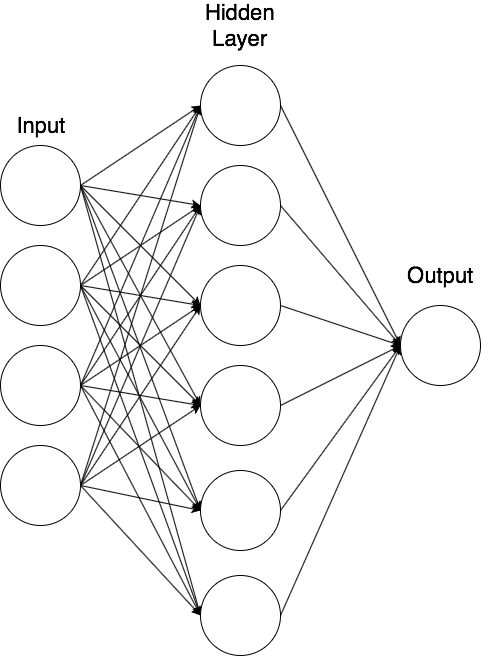
</center>

# What are the properties of the loss?
* Is it convex?
* If not, does it have local minimas?
    * What is a good local minima vs a bad one?
* Are there saddle points?
    * Are they strict?
    * Can the optimizer get stuck in saddle points?
* Is there something special about those minimas that generalize well?
    * Flatness/Sharpness?

# Is it convex?

# Soltanolkotabi, Javanmard, Lee, 2017
Consider a neural network of the form

$$
    x \to v^T \phi(W x)
$$

where $\phi(z) = z^2$, $W \in \mathbb{R}^{k \times d}$, $v \in \mathbb{R}^k$, $x \in \mathbb{R}^d$.
* Assume $k \geq 2d$
* $v$ has at least $d$ positive entries and $d$ negative ones.

Then
$$
    \mathcal{L}(W) = \frac{1}{2n} \sum_{i=1}^n (y_i - v^T \phi(W x_i))^2
$$

* Have only global minimas

* All saddlepoints have a direction of strictly negative curvature

* If $x_i$ are i.i.d. $\mathcal{N}(0,I_d)$ and if

$$
    d \leq n \leq c d^2
$$

then with probability at least $1-\frac{c_1}{n}$ the global optimum is **zero**.

* If the data was generated by a network in the same class then even approximate minimas provide a bound on the loss.

# What happens with ReLU?

# Safran, Shamir, 2018
Consider a neural network of the form

$$
    x \to \sum_{i=1}^m \phi(w_i \cdot x)
$$

with $\phi(x) = \max\{x,0\}$ (ReLU). 

* Assume that the data is generated by a network of similar type, then we are considering

$$
    \min_{W} \mathbb{E}_{x \sim N(0,I)} \left [ \frac{1}{2} \left ( \sum_{i=1}^m \phi(w_i \cdot x) - \sum_{i=1}^k \phi(w_i^\ast \cdot x)\right )^2 \right ]
$$

* If $m \geq k$ we can choose $w_i$ such that we have zero loss.

* If $x \in \mathbb{R}^k$ and $\{w_i^\ast\} = W^\ast \in \mathbb{R}^{k \times k}$ is an orthogonal matrix. Then for $m=k\in\{6,\ldots,20\}$ and $m-1 = k \in \{6,\ldots,20\}$, the loss function has spurious local minima.

* Computer assisted proof.

# Safran, Shamir, 2018
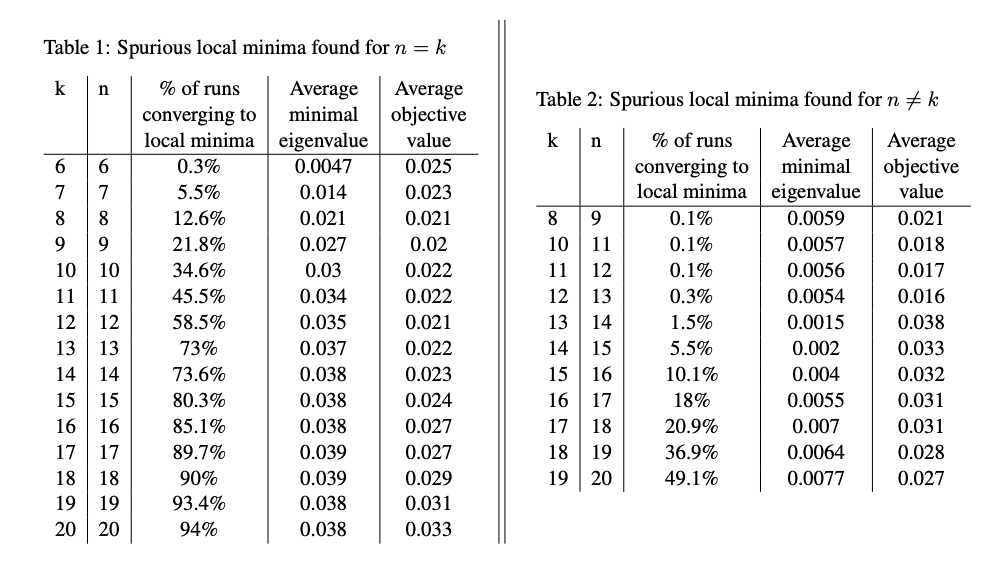

# What if the problem is simple?

# Brutzkus, Globerson, Malach, Shalev-Shwartz, 2017

Consider a neural network of the form

$$
    x \to {\bf v}^T \phi(W x)
$$

define ${\bf v} = (v,\ldots,v,-v,\ldots,-v)$, half positive, half negative. Consider the hinge-loss
$$
    L_S(W) = \frac{1}{n} \sum_{i=1}^n \max \left \{1-y_i {\bf v}^T \phi(W x_i), 0 \right \}
$$
* Consider linearly separable data, with separation vector $w^\ast$, $y \langle w^\ast, x\rangle \geq 1$

* Labels 
$$
y_i \in \{-1,1\}
$$

* $\phi$ is Leaky ReLU, 
$$\phi(x) = \max\{\alpha x, x\}, \quad \alpha \in (0,1)$$

* Run SGD with batch size 1 over a dataset $S$ with $n$ samples.

* $L_S(W)$ satisfies, 
    1. Every critical point is a global minimum, 
    2. It is non-convex.

* SGD converges to a global minimum after performing at most $M_k$ non-zero updates.
$$
    M_k = \frac{\|w^\ast\|^2}{\alpha^2} + O\left ( \frac{\|w^\ast\|^2}{\min\{\eta, \sqrt{\eta}\}} \right )
$$

* Is this a good global minimum? Yes, with high probability.

* Generalization is proved using a compression bound, this is a consequence of the finite number of samples needed to train.
    * "Training is a compression"

# What if we have a lot of parameters?

# Du, Lee, 2018
Consider a neural network of the form

$$
    x \to v^T \phi(W x)
$$

with $v = (1,\ldots,1)$ and $\phi(x) = x^2$.
* If $k \geq d$ then if the Loss function is $C^2$ with $l^2$ regularization then:

* All local minima are global

* All saddles are strict

# Du, Lee, 2018
* Adding penalisation improves generalisation bounds,

$$
    \mathcal{L}(W) + \frac{\lambda}{2} \|W\|^2_F
$$

* This gives small Frobenius norm, they use Rademacher complexity to bound the generalisation error.

# Can we measure the difficulty of a problem?

# Arora, Du, Hu, Li, Wang, 2019
> Q1: Why do true labels give faster convergence rate than random labels for gradient descent?

> Q2: Is there an easily verifiable complexity measure that can differentiate true labels and random labels?

# Arora, Du, Hu, Li, Wang, 2019
<center>
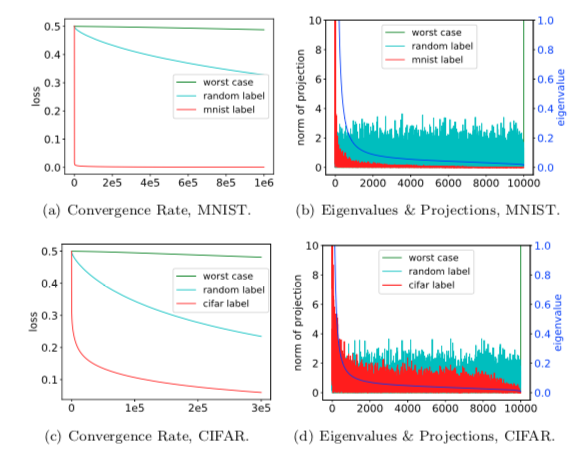
    </center>

# Arora, Du, Hu, Li, Wang, 2019
Again, consider a neural network of the form

$$
    x \to \frac{1}{\sqrt{m}}v^T \phi(W x)
$$

$x \in \mathbb{R}^d$, $W \in \mathbb{R}^{m \times d}$, $v \in \mathbb{R}^m$.

Use the $L^2$ loss

$$
    \mathcal{L}(W) = \frac{1}{2} \sum_{i=1}^n (y_i - v^T \phi(W x_i))^2.
$$

We use the following initial values for the weights

$$
    w_i(0) \sim \mathcal{N}(0,\kappa^2 I), \quad v_i \sim \text{unif}(\{-1,1\})
$$

# Arora, Du, Hu, Li, Wang, 2019
* $v$ is not trained.

* The data satisfies $\|x\|=1$ and $|y| \leq 1$.

Given, $\{x_i\}_{i=1}^n$, we define the following matrix $H^\infty \in \mathbb{R}^{n \times n}$ as follows

$$
    {\bf H}_{ij}^\infty = \mathbb{E}_{w \sim \mathcal{N}(0,I)} \left [ x_i \cdot x_j 1_{\left \{w \cdot x_i \geq 0, w \cdot x_j \geq 0 \right \}} \right ]
$$

* Perform full gradient descent

For given $\delta \in (0,1)$, there exists $m$ and learning rate $\eta$ such that with probability at least $1-\delta$ over the random initialization, we have 

$$
    \mathcal{L}(W(0)) = O(n/\delta)
$$
and
$$
    \mathcal{L}(W(k+1)) \leq \left ( 1 - \frac{\eta \lambda_0}{2} \right ) \mathcal{L}(W(k)), \quad \forall k \geq 0
$$

* $\lambda_0$ is the smallest eigenvalue of the matrix ${\bf H}^\infty$.

# How does the loss surface look like close to a minima?

# Li, Xu, Taylor, Studer, Goldstein, 2017
## Visualize the loss surface?
* Run SGD with decreasing step size until we "notice no improvement".
* Explore the loss function around that point...
* Their idea, take two random directions in the weight space
$$
    \frac{d_{i,j}}{\|d_{i,j}\|} \|\theta_{i,j}\|, \quad \text{kernel-wise normalization}
$$

>* Some have suggested that "flat" minima generalize well while "sharp" minima generalize poorly
* Some have suggested that the smaller the batch size the flatter the minima

# Li, Xu, Taylor, Studer, Goldstein, 2017
## Cifar10
<img src="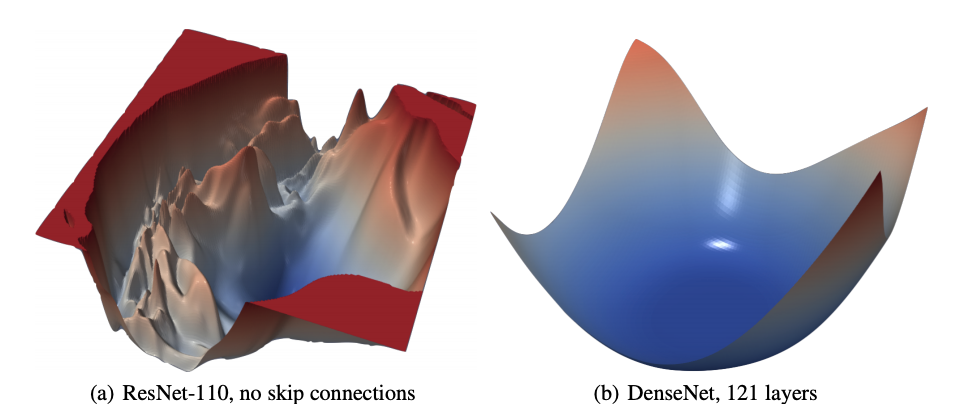
">

# Li, Xu, Taylor, Studer, Goldstein, 2017
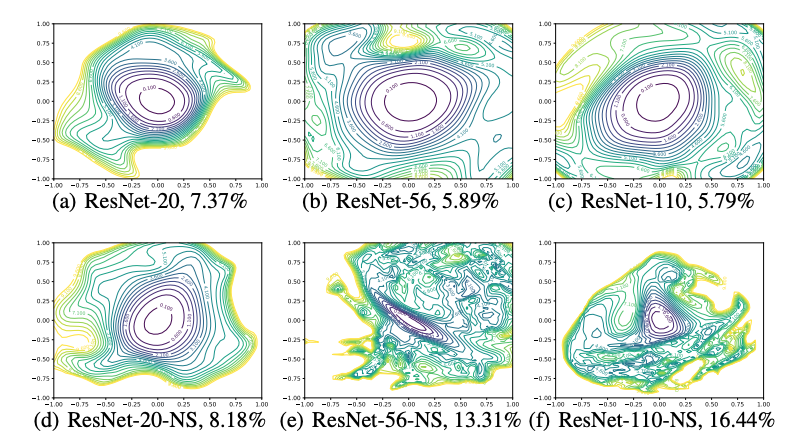

# Li, Xu, Taylor, Studer, Goldstein, 2017
<center>
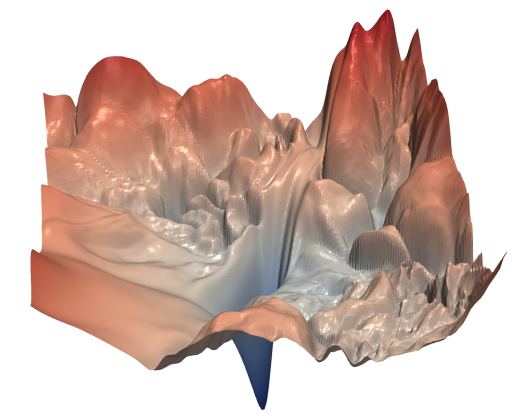
    </center>

# References
* Soltanolkotabi, Javanmard, Lee, *Theoretical insights into the optimization landscape of over-parameterized shallow neural networks.* [https://arxiv.org/pdf/1707.04926.pdf](https://arxiv.org/pdf/1707.04926.pdf)
* Safran, Shamir, Spurious Local Minima are Common in Two-Layer ReLU Neural Networks. [https://arxiv.org/pdf/1712.08968.pdf](https://arxiv.org/pdf/1712.08968.pdf)
* Brutzkus, Globerson, Malach, Shalev-Shwartz, *SGD Learns Over-parameterized Networks that Provably Generalize on Linearly Separable Data.* [https://arxiv.org/pdf/1710.10174.pdf](https://arxiv.org/pdf/1710.10174.pdf)
* Du, Lee, *On the Power of Over-parametrization in Neural Networks with Quadratic Activation.* [https://arxiv.org/pdf/1803.01206.pdf](https://arxiv.org/pdf/1803.01206.pdf)
* Arora, Du, Hu, Li, Wang, *Fine-Grained Analysis of Optimization and Generalization for Overparameterized Two-Layer Neural Networks.* [https://arxiv.org/pdf/1901.08584.pdf](https://arxiv.org/pdf/1901.08584.pdf)
* Li, Xu, Taylor, Studer, Goldstein, *Visualizing the Loss Landscape of Neural Nets.*[https://arxiv.org/pdf/1712.09913.pdf](https://arxiv.org/pdf/1712.09913.pdf)